## Run Trajectory Predictor on discrete spectrum data
This is a tutorial on the `TrajectoryPredictor`. We use discrete spectrum data as used in the paper ["Bethany Lusch, J. Nathan Kutz & Steven L. Brunton - Deep learning for universal linear embeddings of nonlinear dynamics"](https://www.nature.com/articles/s41467-018-07210-0). The data consists of trajectories, each with 51 indexed states of 2 dimensions. Thus, each trajectory is a rollout of an initial state $x_0$ for indexes up till $x_{50}$. We will learn the training data trajectories, valdiate and test the model on validation and test trajectories, respectively, then use the learned model to predict the unknown trajectories for new initial states.

In [1]:
from deepk.trajectory_predictor import *
from deepk import utils

### Load data

In [2]:
import pickle
with open('./data.pkl', 'rb') as f:
    data = pickle.load(f)

The resulting `data` dictionary is documented [here](https://galoisinc.github.io/deep-koopman/core.html#deepk.core.DeepKoopman). Its contents are:
- `'Xtr'` of shape `(10500,51,2)`. This corresponds to 10,500 training trajectories, each containing 2-dimensional states from $x_0$ to $x_{50}$.
- `'Xva'` of shape `(1000,51,2)`, corresponding to 1000 validation trajectories.
- `'Xte'` of shape `(500,51,2)`, corresponding to 500 validation trajectories.

We'll now create a Data Handler. This has required argument `Xtr`, since training data must be provided. Optionally, we can also provide validation and test data. 

In [3]:
dh = TrajectoryPredictor_DataHandler(
    Xtr=data['Xtr'],
    Xva=data['Xva'],
    Xte=data['Xte']
)

The following is an optional step used to seed the run. Since neural nets initialize their parameters randomly, setting the same random seed will ensure that your results are exactly the same as this tutorial.

In [4]:
utils.set_seed(10)

### Create Trajectory Predictor object
This is documented [here](https://galoisinc.github.io/deep-koopman/core.html#deepk.core.DeepKoopman).

In [5]:
tp = TrajectoryPredictor(
    dh = dh,
    encoded_size = 50
)

Log file = /Users/sourya/work/Essence/deep-koopman/examples/discrete_spectrum/log_NeSrai5QhUDj5oWbQRG2v7.log


Thus, the encoded vector $g(x)$ will be $50$-dimensional. Since by default `encoder_hidden_layers = [100]`, the overall network looks like:
<figure><center>
<img src="nn_architecture.png" width=480/>
</center></figure>

### Training and testing
This uses all the default training settings, which can be found [here](https://galoisinc.github.io/deep-koopman/core.html#deepk.core.DeepKoopman.train_net).

In [7]:
tp.train_net()
tp.test_net()

100%|██████████| 10/10 [01:19<00:00,  8.00s/it]


### Visualizing results
Let's plot:
- The [MSE loss](https://galoisinc.github.io/deep-koopman/losses.html#deepk.losses.mse) for the prediction task.
- The [overall loss](https://galoisinc.github.io/deep-koopman/losses.html#deepk.losses.overall), which is a linear combination of different losses that is optimized during training via gradient descent.

Saving figure /Users/sourya/work/Essence/deep-koopman/examples/discrete_spectrum/plot_NeSrai5QhUDj5oWbQRG2v7_pred_loss.png
Saving figure /Users/sourya/work/Essence/deep-koopman/examples/discrete_spectrum/plot_NeSrai5QhUDj5oWbQRG2v7_total_loss.png


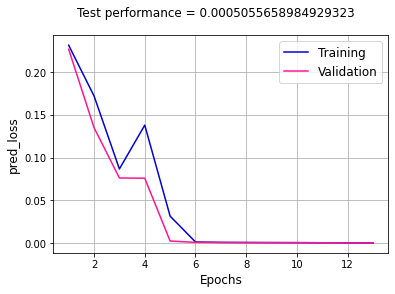

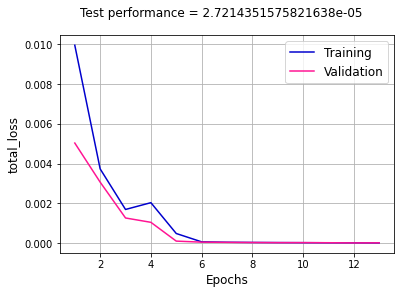

In [9]:
utils.plot_stats(tp, ['pred_loss', 'total_loss'])

`loss` and `pred_loss` go down as expected and the final losses on test data are low. Keep in mind that losses are measured for the *entire trajectory* of 51 states, which the trained model is generating from just the initial state.

Let's see if we can do better.

### Optimizing
Let's tweak the settings and re-run for a longer time. This may take several minutes.

  0%|          | 0/50 [00:00<?, ?it/s]

Log file = /Users/sourya/work/Essence/deep-koopman/examples/discrete_spectrum/log_WUpyTrBYtzgQdQNwCPLq2i.log


100%|██████████| 50/50 [12:26<00:00, 14.93s/it]


Saving figure /Users/sourya/work/Essence/deep-koopman/examples/discrete_spectrum/plot_WUpyTrBYtzgQdQNwCPLq2i_pred_loss.png
Saving figure /Users/sourya/work/Essence/deep-koopman/examples/discrete_spectrum/plot_WUpyTrBYtzgQdQNwCPLq2i_total_loss.png


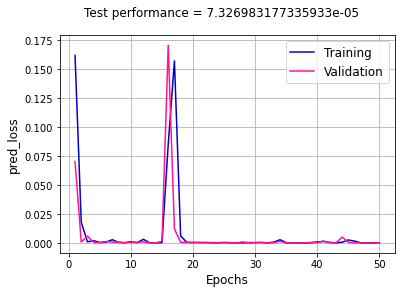

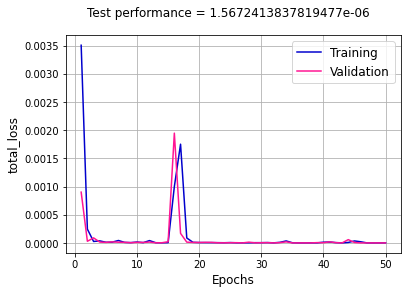

In [10]:
utils.set_seed(10)

tp = TrajectoryPredictor(
    dh = dh,
    encoded_size = 100,
    encoder_hidden_layers = [100,100]
)

tp.train_net(
    numepochs = 50,
    batch_size = 125
)

tp.test_net()

utils.plot_stats(tp, ['pred_loss', 'total_loss'])

There is a spike in the early half of training; eventually the overall loss on test data is more than an order of magnitude better than last time at $1.56\times10^{-6}$.

### Unknown trajectory predictions
Let's use the trained model to generate trajectories for a couple of initial states that are $x_0 = [0.5, 0.5]$ and $x_0 = [-0.4,0.6]$.

In [16]:
tp.predict_new([[0.5,0.5], [-0.4,0.6]])

tensor([[[ 0.5000,  0.5000],
         [ 0.4845,  0.4835],
         [ 0.4838,  0.4749],
         [ 0.4845,  0.4744],
         [ 0.4837,  0.4693],
         [ 0.4830,  0.4656],
         [ 0.4829,  0.4604],
         [ 0.4825,  0.4564],
         [ 0.4824,  0.4518],
         [ 0.4820,  0.4476],
         [ 0.4816,  0.4434],
         [ 0.4813,  0.4393],
         [ 0.4809,  0.4352],
         [ 0.4806,  0.4313],
         [ 0.4802,  0.4274],
         [ 0.4799,  0.4234],
         [ 0.4796,  0.4195],
         [ 0.4791,  0.4157],
         [ 0.4787,  0.4116],
         [ 0.4782,  0.4075],
         [ 0.4778,  0.4035],
         [ 0.4773,  0.3995],
         [ 0.4768,  0.3957],
         [ 0.4764,  0.3919],
         [ 0.4759,  0.3881],
         [ 0.4754,  0.3845],
         [ 0.4750,  0.3809],
         [ 0.4745,  0.3774],
         [ 0.4740,  0.3740],
         [ 0.4735,  0.3706],
         [ 0.4730,  0.3673],
         [ 0.4725,  0.3639],
         [ 0.4720,  0.3606],
         [ 0.4715,  0.3573],
         [ 0.4